# Imports

In [74]:
import pandas as pd
import numpy as np
from scipy.io import mmread
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import pearsonr, ranksums
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import statsmodels.stats.multitest as smt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Data Preprocessing

In [2]:
#read in the sparse matrix
data = mmread("E-GEOD-76312.aggregated_filtered_normalised_counts.mtx")
#transform sparse matrix into pandas dataframe
data = pd.DataFrame.sparse.from_spmatrix(data)

#load the genes (in the format of ensembl id)
gene = pd.read_csv("E-GEOD-76312.aggregated_filtered_normalised_counts.mtx_rows",delimiter = "\t",header = None)[0].values
#load the gene names
cell_id = pd.read_csv("E-GEOD-76312.aggregated_filtered_normalised_counts.mtx_cols", delimiter = "\t",header = None)[0].values

#transform the row and column index of the dataframe into gene ensembl and cell id respectively
data.index = gene
data.columns = cell_id

print(data.shape)
data.head()

(27118, 2151)


,SRR3052083,SRR3052084,SRR3052085,SRR3052086,SRR3052087,SRR3052088,SRR3052089,SRR3052090,SRR3052091,SRR3052092,...,SRR5456187,SRR5456188,SRR5456189,SRR5456190,SRR5456191,SRR5456192,SRR5456193,SRR5456194,SRR5456195,SRR5456196
ENSG00000000003,1.848425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.220118,0.000000,0.000000,...,0.000000,0.0000,0.000000,1.594196,0.409923,2.122996,0.00000,0.000000,0.000000,1.246196
ENSG00000000419,0.922133,201.239100,0.000000,64.100410,1.302134,0.000000,0.000000,0.771098,127.333510,258.883200,...,0.000000,508.2891,60.324370,0.000000,1.229770,0.424553,445.82940,267.926670,0.000000,0.287090
ENSG00000000457,14.105330,45.350548,27.500156,24.328178,21.817270,15.758317,3.566042,19.376453,23.881630,37.535576,...,18.358406,1588.4178,40.131010,13.045530,34.460392,13.971558,27.20065,30.016335,12.008236,14.492656
ENSG00000000460,0.922133,0.000000,0.000000,0.000000,1.953201,1.820742,0.000000,0.771098,10.582026,0.000000,...,0.000000,0.0000,0.781743,1.438031,0.000000,0.525876,0.00000,0.000000,0.726846,0.000000
ENSG00000000938,0.000000,0.000000,0.000000,503.646100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [3]:
X = data.T
print(X.shape)
X.head()

(2151, 27118)


,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000288393,ENSG00000288460,ENSG00000288525,ENSG00000288534,ENSG00000288547,ENSG00000288550,ENSG00000288556,ENSG00000288558,ENSG00000288564,ENSG00000288579
SRR3052083,1.848425,0.922133,14.105330,0.922133,0.0000,0.000000,0.000000,0.000000,0.000000,3.538667,...,0.0,0.0,2.7664,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
SRR3052084,0.000000,201.239100,45.350548,0.000000,0.0000,0.000000,0.698747,1.213876,20.962408,14.077494,...,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,1.397494
SRR3052085,0.000000,0.000000,27.500156,0.000000,0.0000,0.000000,0.000000,0.000000,0.401888,0.406227,...,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,5.224539
SRR3052086,0.000000,64.100410,24.328178,0.000000,503.6461,0.000000,3.052401,0.000000,0.000000,9.157202,...,0.0,0.0,0.0000,29.308508,0.0,0.0,0.0,0.0,0.0,6.104801
SRR3052087,0.000000,1.302134,21.817270,1.953201,0.0000,1.953201,0.000000,0.000000,0.651067,3.906401,...,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.651067


In [4]:
meta =  pd.read_csv("ExpDesign-E-GEOD-76312.tsv",delimiter = "\t")

#View the distribution of disease type of cells
meta["Sample Characteristic[disease]"].value_counts()
y = meta["Sample Characteristic[disease]"]

## One-Hot Encoding

In [5]:
# Integer mapping
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
print(integer_encoded)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

# One hot encoding
onehot_encoder = OneHotEncoder(sparse = False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

y = integer_encoded.ravel()

[1 1 1 ... 0 0 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## Visualization of Data

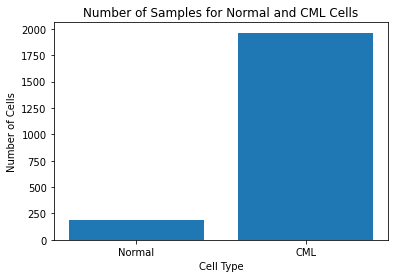

In [6]:
#Visualization of the Data
#1. Show the data is unbalanced (y-axis: number of samples, x-axis: cell type, histogram)
cell_type = ['Normal', 'CML']
sample_size = [187, 1964]

type = [i for i,_ in enumerate(cell_type)]
plt.bar(type, sample_size)
plt.xlabel('Cell Type')
plt.ylabel('Number of Cells')
plt.title('Number of Samples for Normal and CML Cells')
plt.xticks(type, cell_type)
plt.show()

## Train/Test Split

In [68]:
# For Wilcoxon Test
#Split dataset by class label and then do train/test split
#Get the set for class 0
index = [i for i in range(len(y)) if y[i] == 0]
data_class0 = data.iloc[:,index]
y_class0 = y[index]

#Get the set for class 1
index = [i for i in range(len(y)) if y[i] == 1]
data_class1 = data.iloc[:,index]
y_class1 = y[index]

# Split Data into training and testing set
# Validation will be automatically split when evaluating model with cv
# X_train0, X_test0, y_train0, y_test0 = train_test_split(data_class0.T, y_class0, test_size=0.3, shuffle=False)
# X_train1, X_test1, y_train1, y_test1 = train_test_split(data_class1.T, y_class1, test_size=0.3, shuffle=False)
X_train0, X_test0, y_train0, y_test0 = train_test_split(data_class0.T, y_class0, test_size=0.3, shuffle=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_class1.T, y_class1, test_size=0.3, shuffle=True)
X_train_m1 = pd.concat([X_train0, X_train1])
X_test_m1 = pd.concat([X_test0, X_test1])
y_train_m1 = np.concatenate((y_train0, y_train1))
y_test_m1 = np.concatenate((y_test0, y_test1))

In [50]:
# For Correlation
#Use the whole dataset
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X, y, test_size=0.3, shuffle=False)

## Feature Selection

In [69]:
# Wilcoxon features
p_val = []
for i in range(X_train0.shape[1]):
    p = ranksums(X_train0.iloc[:,i], X_train1.iloc[:,i]).pvalue
    p_val.append(p)
    # if p <= 0.03:
    #     index3.append(i)

index4 = []
adj_p = smt.multipletests(p_val, alpha = 0.03)
for index, j in enumerate(adj_p[1]):
    if j <= 0.03: 
        index4.append(index)

X_m1 = X.iloc[:,index4]
X_train_m1 = X_train_m1.iloc[:,index4]
X_test_m1 = X_test_m1.iloc[:, index4]

In [10]:
# Correlation features
def corr(X,y):
    corr = []
    for i in range(X.shape[1]):
        corr.append(abs(pearsonr(X.iloc[:,i], y)[0])) 
    c = sorted(range(len(corr)), key=lambda x: corr[x])[-100:]
    return c
c_m2 = corr(X_train_m2,y_train_m2)
print(c_m2)

#X with selected features
X_m2 = X.iloc[:,c_m2]

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


[26571, 25432, 25364, 22219, 25350, 25999, 13551, 26052, 22187, 26435, 26295, 26561, 12678, 22125, 26160, 13498, 26587, 12594, 23593, 26496, 26836, 27008, 26265, 12535, 12674, 25240, 22215, 22119, 26181, 26585, 26219, 12570, 26453, 26550, 26390, 26462, 26355, 26199, 22251, 12661, 26383, 25994, 22257, 26369, 26242, 26687, 22213, 25264, 26649, 22820, 22596, 26381, 26698, 26677, 22453, 22161, 26630, 22337, 26208, 13483, 22355, 25349, 26686, 25956, 20137, 27088, 26422, 12618, 22769, 22742, 23631, 25274, 26958, 22318, 26183, 12393, 23615, 13470, 26619, 26912, 20023, 26572, 13489, 26742, 22699, 22540, 22792, 22879, 22509, 23387, 13521, 12882, 20246, 25376, 22181, 26236, 19499, 22920, 26503, 24812]


In [70]:
# Wilcoxon + Correlation
c = corr(X_train_m1,y_train_m1)
X_m3 = X.iloc[:,index4].iloc[:,c]
X_train_m3 = X_train_m1.iloc[:,c]
X_test_m3 = X_test_m1.iloc[:, c]
y_train_m3 = y_train_m1
y_test_m3 = y_test_m1

# Model Training & Evaluation

### Wilcoxon

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.545


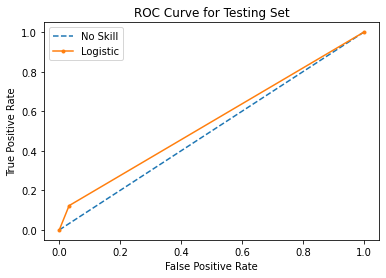

In [32]:
# Standard DT
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_m1, y_train_m1)
lr_probs = clf.predict_proba(X_test_m1)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_m1))]
# calculate scores
ns_auc = roc_auc_score(y_test_m1, ns_probs)
lr_auc = roc_auc_score(y_test_m1, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_m1, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_m1, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.651


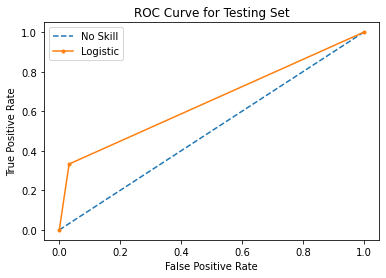

In [33]:
# Cost-sensitive DT
clf = tree.DecisionTreeClassifier(class_weight=weights)
clf.fit(X_train_m1, y_train_m1)
lr_probs = clf.predict_proba(X_test_m1)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_m1))]
# calculate scores
ns_auc = roc_auc_score(y_test_m1, ns_probs)
lr_auc = roc_auc_score(y_test_m1, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_m1, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_m1, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.808


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


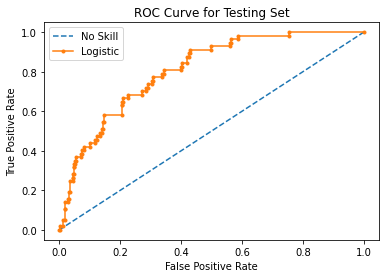

In [23]:
# Standard LR
weights = {0:1.0, 1:10.5}
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_m1, y_train_m1) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_m1)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_m1))]
# calculate scores
ns_auc = roc_auc_score(y_test_m1, ns_probs)
lr_auc = roc_auc_score(y_test_m1, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_m1, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_m1, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.829


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


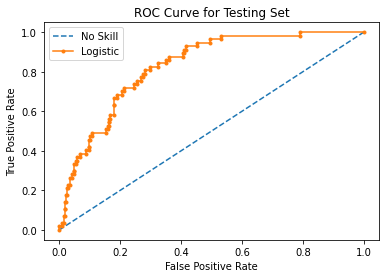

In [24]:
# Cost-sensitive LR
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X_train_m1, y_train_m1) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_m1)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_m1))]
# calculate scores
ns_auc = roc_auc_score(y_test_m1, ns_probs)
lr_auc = roc_auc_score(y_test_m1, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_m1, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_m1, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.920


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


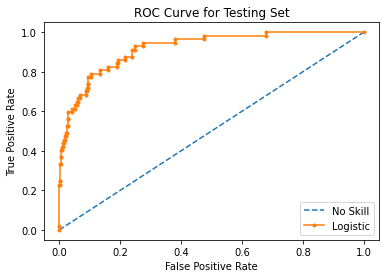

In [72]:
#Shuffle = True
# Cost-sensitive LR
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X_train_m1, y_train_m1) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_m1)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_m1))]
# calculate scores
ns_auc = roc_auc_score(y_test_m1, ns_probs)
lr_auc = roc_auc_score(y_test_m1, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_m1, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_m1, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
plt.show()

### Correlation

In [73]:
# Standard LR
# model = LogisticRegression(solver='lbfgs')
# model.fit(X_train_m2, y_train_m2) #.decision_function(X_test_selected)
# lr_probs = model.predict_proba(X_test_m2)
# lr_probs = lr_probs[:, 1]
# ns_probs = [0 for _ in range(len(y_test_m2))]
# # calculate scores
# ns_auc = roc_auc_score(y_test_m2, ns_probs)
# lr_auc = roc_auc_score(y_test_m2, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_test_m2, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_test_m2, lr_probs)
# # axis labels
# plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
# plt.title('ROC Curve for Testing Set')
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.legend()
# plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.733


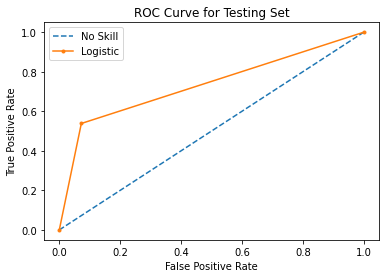

In [99]:
# Cost-sensitive DT
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X, y, test_size=0.3, shuffle=True)
c_m2 = corr(X_train_m2,y_train_m2)
X_train_m2 = X_train_m2.iloc[:,c_m2]
X_test_m2 = X_test_m2.iloc[:,c_m2]
clf = tree.DecisionTreeClassifier(class_weight=weights)
clf.fit(X_train_m2, y_train_m2)
lr_probs = clf.predict_proba(X_test_m2)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_m2))]
# calculate scores
ns_auc = roc_auc_score(y_test_m2, ns_probs)
lr_auc = roc_auc_score(y_test_m2, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_m2, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_m2, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
plt.show()

In [98]:
# Cost-sensitive LR
X_train_m2 = X_train_m2.iloc[:,c_m2]
X_test_m2 = X_test_m2.iloc[:,c_m2]

model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X_train_m2, y_train_m2) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_m2)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_m2))]
# calculate scores
ns_auc = roc_auc_score(y_test_m2, ns_probs)
lr_auc = roc_auc_score(y_test_m2, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_m2, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_m2, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

IndexError: positional indexers are out-of-bounds

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.838


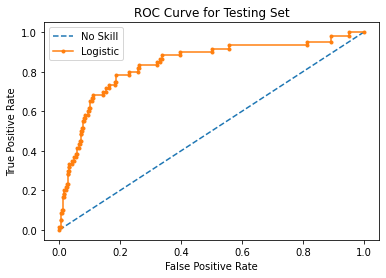

In [92]:
# Cost-sensitive LR (Shuffle = True)
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X, y, test_size=0.3, shuffle=True)
c_m2 = corr(X_train_m2,y_train_m2)
X_train_m2 = X_train_m2.iloc[:,c_m2]
X_test_m2 = X_test_m2.iloc[:,c_m2]

model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X_train_m2, y_train_m2) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_m2)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_m2))]
# calculate scores
ns_auc = roc_auc_score(y_test_m2, ns_probs)
lr_auc = roc_auc_score(y_test_m2, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_m2, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_m2, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### Wilcoxon + Correlation

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.825


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


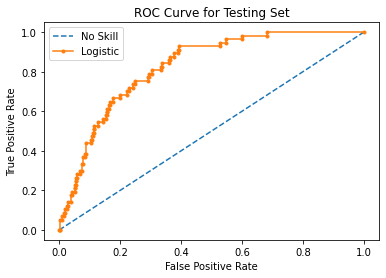

In [67]:
# For Correlation + Wilcoxon
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X_train_m3, y_train_m3) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_m3)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_m3))]
# calculate scores
ns_auc = roc_auc_score(y_test_m3, ns_probs)
lr_auc = roc_auc_score(y_test_m3, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_m3, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_m3, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.933


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


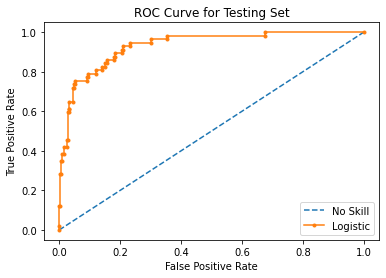

In [71]:
# Cost-sensitive LR (Shuffle = True)
# For Correlation + Wilcoxon
# X_train_m3, X_test_m3, y_train_m3, y_test_m3 = train_test_split(X_m3, y, test_size=0.3, shuffle=True)

model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X_train_m3, y_train_m3) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_m3)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_m3))]
# calculate scores
ns_auc = roc_auc_score(y_test_m3, ns_probs)
lr_auc = roc_auc_score(y_test_m3, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_m3, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_m3, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.939


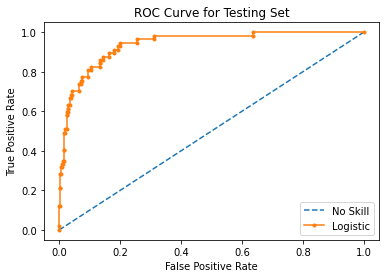

In [80]:
import warnings
warnings.filterwarnings("ignore")
model = LogisticRegressionCV(cv=5, random_state=0, class_weight=weights)
model.fit(X_train_m3, y_train_m3) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_m3)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_m3))]
# calculate scores
ns_auc = roc_auc_score(y_test_m3, ns_probs)
lr_auc = roc_auc_score(y_test_m3, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_m3, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_m3, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


### No Feature Selection

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.958


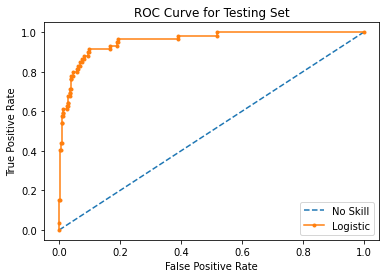

In [37]:
# Cost-sensitive LR (Shuffle = True)
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X, y, test_size=0.3, shuffle=True)
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X_train_m2, y_train_m2) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_m2)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_m2))]
# calculate scores
ns_auc = roc_auc_score(y_test_m2, ns_probs)
lr_auc = roc_auc_score(y_test_m2, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_m2, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_m2, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.978


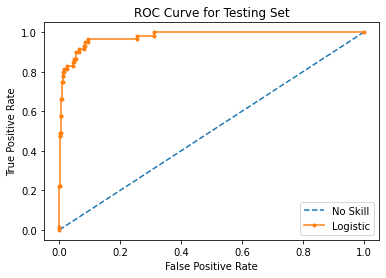

In [81]:
# Cost-sensitive LR (Shuffle = True)
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X, y, test_size=0.3, shuffle=True)
model = LogisticRegressionCV(cv=5, random_state=0, solver='lbfgs', class_weight=weights)
model.fit(X_train_m2, y_train_m2) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_m2)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_m2))]
# calculate scores
ns_auc = roc_auc_score(y_test_m2, ns_probs)
lr_auc = roc_auc_score(y_test_m2, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_m2, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_m2, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()